In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Loading Dataset

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


c:\users\aurnob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

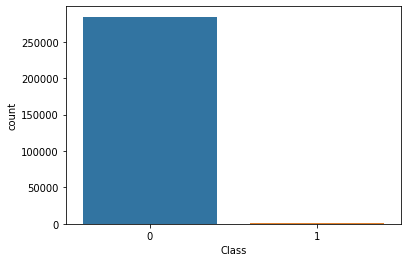

In [4]:
sns.countplot(df.Class)

MSMOTE to handle imbalanced data

c:\users\aurnob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

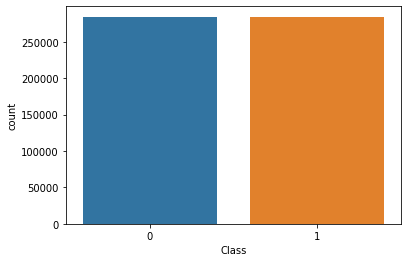

In [5]:
x=df.drop('Class',axis=1)
y=df['Class']
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)
sns.countplot(y)

c:\users\aurnob\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

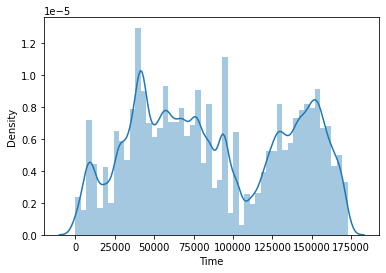

In [6]:
df1=pd.concat([x,y],axis=1)
sns.distplot(df1['Time'])

c:\users\aurnob\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

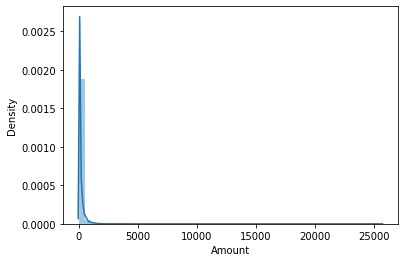

In [7]:
sns.distplot(df1['Amount'])

<AxesSubplot:xlabel='Time', ylabel='Amount'>

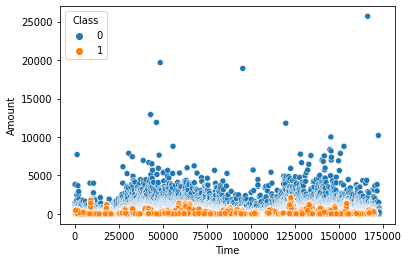

In [8]:
sns.scatterplot(x='Time',y='Amount',hue='Class',data=df1)

<AxesSubplot:>

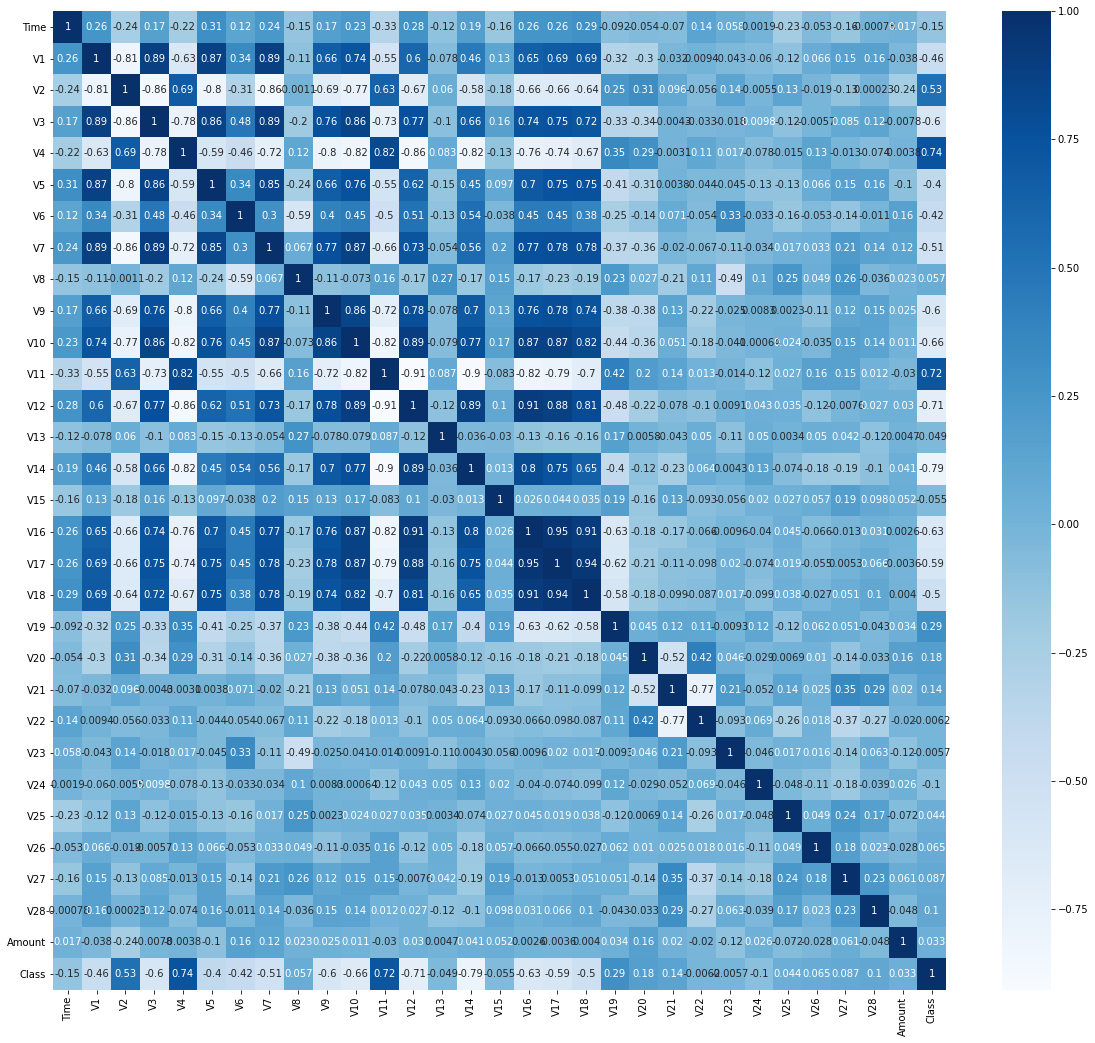

In [9]:
plt.figure(figsize=(20,18))
sns.heatmap(df1.corr(),annot=True,cmap="Blues")

# Scalling with Standard Scale

In [10]:
s=StandardScaler()
d=['Amount']
df1[d]=s.fit_transform(df1[d])


In [11]:
d2=['Time']
df1[d2]=s.fit_transform(df1[d2])

In [12]:
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df1.drop('Class',axis=1)
y=df1['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
def predict(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    return accuracy_score(y_test,preds)

In [16]:
models=['LR','XGB','RF']
acc=[]

# Logistic Regression

In [17]:
predict(LogisticRegression(),x_train,x_test,y_train,y_test)

[[56333   489]
 [ 1750 55154]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56822
           1       0.99      0.97      0.98     56904

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



0.9803123296343844

# Xgboost

In [28]:
predict(XGBClassifier(),x_train,x_test,y_train,y_test)

c:\users\aurnob\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[56804    18]
 [    0 56904]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56822
           1       1.00      1.00      1.00     56904

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



0.9998417248474404

In [19]:
models=['LR','XGB','RF']
acc=[]

# Random Forest Classifier

In [20]:
predict(RandomForestClassifier(),x_train,x_test,y_train,y_test)

[[56809    13]
 [    0 56904]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56822
           1       1.00      1.00      1.00     56904

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



0.9998856901675958